Здесь мы играемся с входными данными и учимся строить и рисовать граф <b>G<b>

In [57]:
%matplotlib inline
import networkx
from networkx import *

In [2]:
file = open('id_group.txt')
data_id=file.read().split('\n')
data_id = list(map(int,data_id))

<b>data_id</b> – это лист с айди вк по которым будет происходить поиск общих друзей

In [3]:
data_id

[559640345,
 29759351,
 120435774,
 78517271,
 55564167,
 202514864,
 79818398,
 18214699,
 25689500,
 322913600,
 32418429,
 32784038,
 55355150,
 65817487,
 76637395,
 31710423,
 557916962,
 44907648,
 183239130,
 180691077]

Пробуем рисовать граф с помощью модуля networkx. Можно задавать узлы сразу массивом и заполнять в граф используя  <b>.add_nodes_from(nodes)</b>, а ребра можно задавать с помощью массива пар связи узлов (<b>.add_edges_from(edges)</b>)
    
 Узлы и связи можно добовлять и по одному: 
     <b>G.add_node(10) G.add_edge(10,0)</b>
 

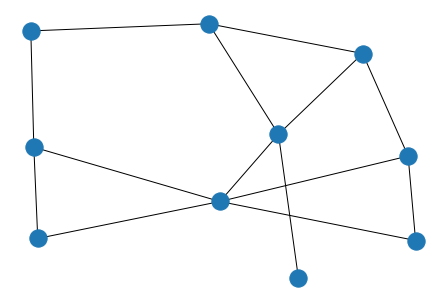

In [69]:
G = nx.Graph()
nodes = [0,1,2,3,4,5,6,7,8]
edges = [(0,1),(1,2),(2,3), (3,4), (4,5), (5,6),(6,7),(7,8),(8,1),(5,0),(5,6),(5,3),(5,7),(0,8)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.add_node(10)
G.add_edge(10,0)
pos = nx.circular_layout(G)
nx.draw(G)   # тип по умолчанию spring_layout

С помощью изменения параметра <b>alpha</b> делаем так, чтобы у элемента с наибольшим количеством связей была наибольшая насыщенность цвета.

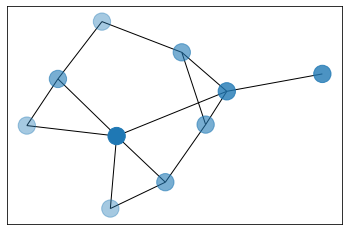

In [70]:
G.degree[1]
pos=nx.spring_layout(G)
pos
eges=[]
for n in nodes:
    eges.append(G.degree[n])
max_eg=max(eges)
alfa = []
for n in nodes:
    alfa.append(G.degree[n]/max_eg)
alfa
draw_networkx_nodes(G,pos,alpha=alfa)
draw_networkx_edges(G, pos)

в модуле networkx есть встроенный метод расчета центральности кратчайшего пути <b>betweenness_centrality(G)</b>

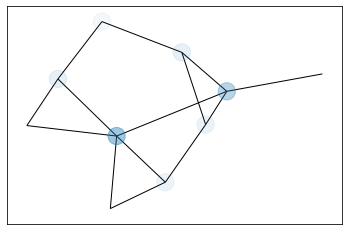

In [75]:
betweenness_centrality(G).values()
draw_networkx_nodes(G,pos,alpha=betweenness_centrality(G).values())
draw_networkx_edges(G, pos)